# Principal Component Analysis

Principal Component Analysis (PCA) is used to determine which features are the most important. PCA is used to reduce the dimensionality of the data to increase the interpretibility of the data. 

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_regression

In [66]:
marathon_data = pd.read_csv(
    r"data\marathon_runners.csv", header=0).drop(columns='Unnamed: 0')
marathon_data = marathon_data.drop_duplicates()
marathon_data = marathon_data[marathon_data["week_1_total_distance"] > 0]
marathon_data = marathon_data[marathon_data["duration"] < 480].reset_index()
scaler = StandardScaler().set_output(transform="pandas")
X = marathon_data.iloc[:, 1:177]
X_scaled = scaler.fit_transform(X)


PCA is applied to the scaled quantitative data and stored in a dataframe.

In [60]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176
0,-0.196811,-1.044034,2.432408,0.409659,-1.441028,-2.909499,-1.622869,1.460394,-0.217266,-1.296439,...,-0.037339,0.007484,-0.005273,-0.009036,0.012771,0.010566,0.001904,-0.001595,0.000721,0.001828
1,-2.601669,0.536097,1.354242,0.140673,-0.985096,-2.058483,-1.034668,0.308963,-0.337166,0.301004,...,0.011655,0.002420,0.009051,0.004894,-0.007669,-0.009230,0.013717,-0.000500,0.002987,0.001170
2,-4.281134,0.397178,-0.083679,0.339475,0.721555,0.280011,-0.910349,-0.162966,1.236689,-1.157862,...,-0.005256,0.009903,-0.007841,0.005942,-0.000174,-0.010012,0.001198,0.003158,-0.006240,0.002599
3,1.760471,2.362173,-1.628616,0.645845,-2.835087,-1.715473,0.280694,-0.174815,0.499243,0.293005,...,0.021481,-0.044971,-0.002253,0.005159,-0.017154,0.006789,0.002383,-0.009296,-0.005318,0.008237
4,1.330719,1.987293,0.068649,-2.438881,-2.273406,0.033422,-1.081474,1.009102,0.385658,-0.730413,...,0.037254,-0.006855,-0.007529,-0.046970,0.012410,0.005626,0.002434,0.005011,0.007287,-0.001222


The loadings of each component is extracted and stored in a dataframe to view which features explain the most variability in the dataset.

In [61]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings.sort_values(by=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"], ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176
week_8_total_distance,0.130166,0.003206,-0.067375,-0.009422,-0.059635,0.048473,-0.093934,-0.016156,-0.093970,-0.046880,...,0.005870,0.014040,-0.008883,0.001716,0.002895,0.004483,0.003768,0.002704,0.000654,0.000865
week_7_total_distance,0.130103,0.002927,-0.081646,0.017889,-0.022648,0.062970,0.000727,-0.004101,-0.065051,-0.039146,...,-0.007359,-0.004668,0.003958,-0.000216,-0.003011,0.003018,-0.002727,-0.001952,-0.001446,-0.002230
week_4_total_distance,0.129563,0.004511,-0.086688,0.055955,0.047402,-0.000124,0.020723,-0.000407,0.057190,0.056203,...,0.003644,-0.004212,0.003137,0.000841,-0.001064,-0.000894,-0.003429,-0.000632,-0.000384,0.002202
week_9_total_distance,0.129038,0.001345,-0.065607,-0.037508,-0.055453,0.048216,-0.023719,0.072415,0.016891,-0.024948,...,0.003335,-0.000345,0.008466,-0.005304,0.001916,-0.003632,0.002427,-0.000388,0.005207,-0.000785
week_6_total_distance,0.128623,0.008483,-0.085378,0.034636,-0.026357,0.068506,0.095046,-0.024792,-0.024236,0.009223,...,0.002367,0.002070,0.002171,-0.003118,0.002365,0.004388,-0.005099,0.001347,-0.002317,0.002562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
week_16_fastest_pace,0.007595,0.052694,0.019756,0.023751,-0.064032,-0.103741,-0.017785,-0.077662,0.053121,-0.005987,...,-0.005501,-0.007411,-0.000457,0.026392,0.028962,0.018834,0.004264,-0.001456,-0.000847,0.000836
week_16_average_pace,0.007087,0.158691,0.099089,-0.016695,0.059341,0.058952,0.053179,0.049115,-0.082141,0.070357,...,0.073432,0.056623,0.015220,-0.334531,-0.387536,-0.300318,-0.042625,0.013917,0.008895,-0.000988
week_7_average_pace,0.005548,0.017191,0.005682,-0.002627,-0.012312,0.016147,-0.042951,-0.041645,-0.010062,0.067585,...,-0.003660,-0.009948,-0.014719,-0.003250,-0.002528,0.001035,0.001709,-0.008185,-0.313151,-0.729609
week_7_fastest_pace,0.003835,0.009739,0.002931,-0.002407,-0.014688,0.012562,-0.046992,-0.042951,-0.005703,0.057689,...,0.002554,-0.010325,0.005521,-0.000879,-0.001510,-0.004663,0.003672,0.002310,0.213360,0.498872


The explained variance of each component is graphed to show how much variance each component explains. The cumulative variance per component is also graphed to show when the amount of explained variance begins to plateua.

In [68]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_ * 100
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 20)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 100)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


array([<AxesSubplot: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

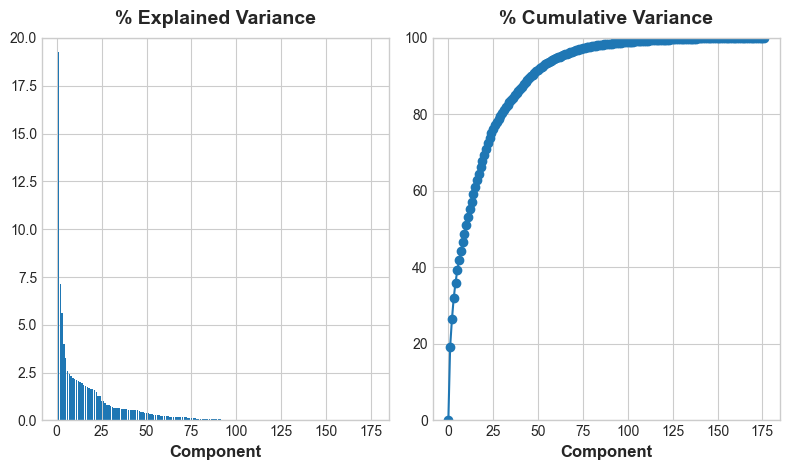

In [69]:
plot_variance(pca)